In [117]:
from PIL import Image
from pathlib import Path
import numpy as np
import math

In [9]:
ROOT = Path().resolve().parent

In [10]:
img_path = ROOT / 'images' / 'hornet.jpg'

In [11]:
img = Image.open(img_path)

In [20]:
img_grey = img.convert('L')

In [22]:
# img_mat

array([[11, 11, 11, ..., 68, 69, 69],
       [11, 11, 11, ..., 68, 68, 69],
       [11, 11, 11, ..., 68, 68, 68],
       ...,
       [51, 51, 51, ..., 20, 19, 19],
       [51, 51, 51, ..., 20, 19, 19],
       [51, 51, 51, ..., 20, 19, 19]], shape=(891, 1296), dtype=uint8)

In [28]:
old_size = img.size

In [211]:
new_size = (old_size[0] // 16, old_size[1] // 16)

In [212]:
new_size

(81, 55)

In [213]:
img_grey = img_grey.resize(new_size)

In [214]:
img_mat = np.array(img_grey)

In [215]:
img_mat.mean()

np.float64(94.08686868686868)

In [216]:
img_mat_filtered = np.where(img_mat>128,img_mat,0)

In [217]:
img_test = Image.fromarray(img_mat_filtered)

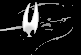

In [218]:
img_test

In [219]:
chars = """$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/|()1{}[]?-_+~<>i!lI;:,"^`'."""

In [220]:
len(chars)

68

In [221]:
new_chars = np.array(list(chars[:-4][::-1]))

In [222]:
# new_chars

In [223]:
# len(new_chars)

In [224]:
def get_ascii(x):
    return np.floor((x - 127) / 2 - 1).astype(int)

In [225]:
img_ascii = np.where(img_mat_filtered>=128,new_chars[get_ascii(img_mat_filtered)],'.')

In [226]:
# img_ascii

In [227]:
lines = []
for line in img_ascii:
    line_list = list(line)
    line_list.append(np.str_('\n'))
    # print(line_list)
    new_line = ''.join(line)
    lines.append(new_line)

In [228]:
# lines[0]

In [229]:
with open ('text.txt', 'w', encoding='utf-8') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [230]:
# with open ('text.txt', 'w', encoding='utf-8') as f:
#     f.write('test')